#EECS 442 PS1: Filtering

__Please provide the following information__
(e.g. Andrew Owens, ahowens):

Calvin Tran, cktran

__Important__: 
1. after you download the .ipynb file, please name it as __your_uniquename_your_umid.ipynb__ before you submit it to canvas. Example: adam_01101100.ipynb. 
2. Please convert the your Colab notebook to a PDF file and submit the PDF file to Gradescope. You can follow [this](https://docs.google.com/document/d/1FvAuB-7NW6jZ8XzSQfkILOAQBdL7mGAXVln8a2ns2Gw/edit?usp=sharing) instructions. For your convenience, we have included the PDF conversion script at the end of this notebook.  




# Introduction

We'll provide you with starter code, like this, in a Jupyter notebook for most problem sets. Please fill in the code to complete the assignment, and submit your notebook to Canvas as a .ipynb file. You can, of course, initially write your code offline in an editor like Emacs or Vim -- we'd just like the final output to be in a notebook format to make grading more consistent. You can also host your notebook locally.

Please note that *we won't run your code*. The notebook you submit should already contain all of the results we ask for. In particular, the visualizations of edge responses and blurred images should be computed *before you submit*.  Also, please do not include long, unnecessary outputs (a few print statements and visualizations are fine, but pages of debugging messages make grading difficult).



# First steps

Run the following code to import the modules that you'll need, and to download the images. You are welcome to modify this code (e.g. by importing more modules).

In [34]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images
import urllib.request

# Download the images that you'll need
base_url = 'https://web.eecs.umich.edu/~ahowens/eecs442/fa20/psets/ps1/ims'
for name in ['dog-1.jpg', 'dog-2.jpg', 'apple.jpg']:
  with open(name, 'wb') as out:
    url = os.path.join(base_url, name)
    out.write(urllib.request.urlopen(url).read())



# Problem 1.2: Pet edge detection (a)

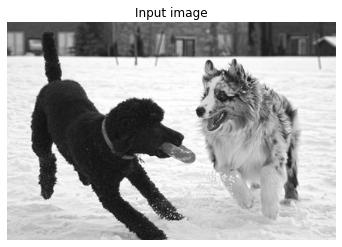

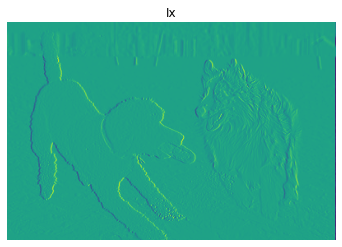

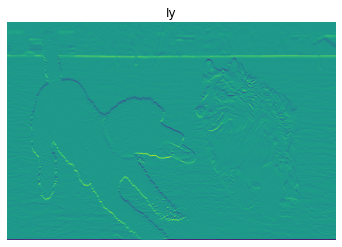

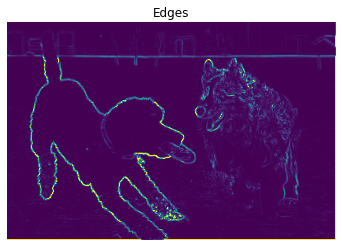

In [35]:
# You can upload images yourself or load them from URLs
im = imageio.imread('dog-1.jpg')
# Convert to grayscale. We'll use floats in [0, 1].
im = im.mean(2)/255.

# Your code here!
######################### Solution code #########################
def convolve(im, h):
  new_im = np.zeros(im.shape)
  x = im.shape[0]
  y = im.shape[1]
  # print("h = ", h.shape)
  for i in range(x):
    for j in range(y):
      # print("p = (", i, ", ", j, ")\n")
      res = 0
      if h.shape[0] > 1 & h.shape[1] == 1: # vertical
        for f in range(h.shape[0]):
          if i+f >= x:  # padding
            res += 0
          else:
            res += im[i+f, j] * h[f, 0]
      elif h.shape[1] > 1 & h.shape[0] == 1: # horizontal 
        for f in range(h.shape[1]):
          # print("f = ", f)
          if j+f >= y:  # padding
            res += 0
          else:
            res += im[i, j+f] * h[0, f]  
      new_im[i, j] = res

  return new_im

dx = np.array([[-1,1]])
# print("dx\n", dx)
dy = np.array([[-1],[1]])
# print("dy\n", dy)
######################### End solution code #########################

# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix)

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy)

plt.figure()
plt.title('Edges')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))


# Problem 1.2: Pet edge detection (c)

Please visualize the images and edges with matplotlib, using code similar to what we provided in (a).

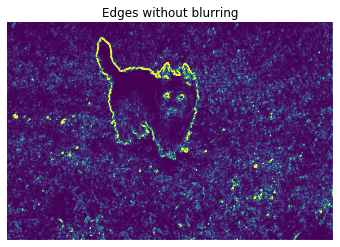

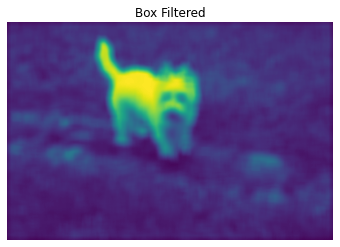

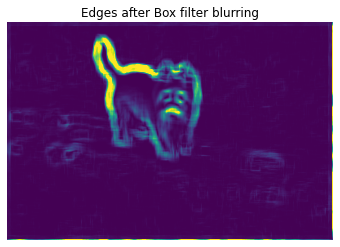

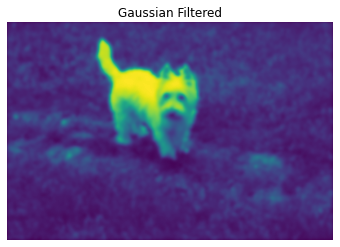

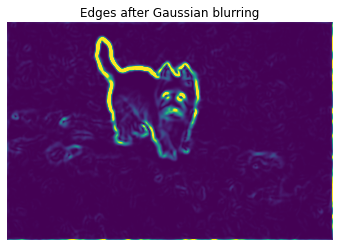

In [36]:
im = imageio.imread('dog-2.jpg').mean(2)/255.

# Your code here!
######################### Solution code #########################
import math
dx = np.array([[-1,1]])
dy = np.array([[-1],[1]])
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.
plt.figure()
plt.title('Edges without blurring')
plt.axis('off')
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))

def gaussian_filter(sigma, shape):
  new_im = np.zeros(shape)
  offset = shape[0]//2
  for x in range(shape[0]):
    for y in range(shape[1]):
      x_off = x - offset
      y_off = offset - y
      new_im[x, y] = (1/float(2*math.pi*(sigma**2))) * (math.e**(-(((x_off**2)+(y_off**2))/float(2*(sigma**2)))))
  return new_im

G = gaussian_filter(sigma=2, shape=(11,11))
# print("G\n", G)
# plt.figure()
# plt.title('Gaussian Filter')
# plt.axis('off')
# plt.imshow(G)

val = 1/(11**2)
box_filter = np.full((11,11), val)
Ib = scipy.ndimage.convolve(im, box_filter, mode='constant', cval=0.0)
plt.figure()
plt.title('Box Filtered')
plt.axis('off')
plt.imshow(Ib)

Ix = convolve(Ib, dx)
Iy = convolve(Ib, dy)
edges_b = Ix**2. + Iy**2.
plt.figure()
plt.title('Edges after Box filter blurring')
plt.axis('off')
plt.imshow(edges_b, vmin = 0., vmax = np.percentile(edges_b, 99))

Ig = scipy.ndimage.convolve(im, G, mode='constant', cval=0.0)
plt.figure()
plt.title('Gaussian Filtered')
plt.axis('off')
plt.imshow(Ig)

Ix = convolve(Ig, dx)
Iy = convolve(Ig, dy)
edges_g = Ix**2. + Iy**2.
plt.figure()
plt.title('Edges after Gaussian blurring')
plt.axis('off')
plt.imshow(edges_g, vmin = 0., vmax = np.percentile(edges_g, 99))

######################### End solution code #########################

# Problem 1.2: Pet edge detection (d)

Please use the visualization code to display the filter you construct.

358.1441084535949
0.001808628166990084


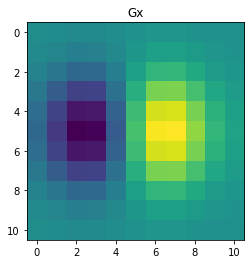

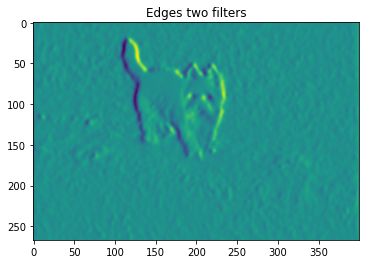

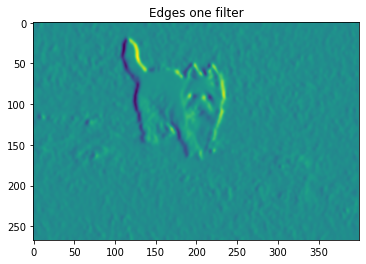

In [37]:
# Your code here!
######################### Solution code #########################
Gx = scipy.ndimage.convolve(gaussian_filter(sigma=2, shape=(11,11)), dx, mode='constant', cval=0.0)
im_blur = scipy.ndimage.convolve(im, G, mode='constant', cval=0.0)
######################### End solution code #########################
plt.figure()
plt.title('Gx')
plt.imshow(Gx)

plt.figure()
plt.title('Edges two filters')
Ix = scipy.ndimage.convolve(im_blur, dx)
plt.imshow(Ix)

plt.figure()
plt.title('Edges one filter')
plt.imshow(scipy.ndimage.convolve(im, Gx))

print(np.abs(np.sum(im_blur - im)))

print(np.abs(scipy.ndimage.convolve(im_blur, dx)[15:-15,15:-15] - scipy.ndimage.convolve(im, Gx)[15:-15,15:-15]).mean())

# Problem 1.2 Pet edge detection (e)
Please visualize the results using matplotlib.

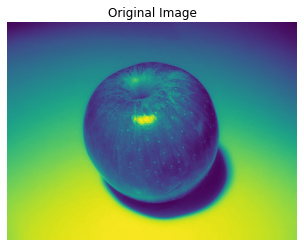

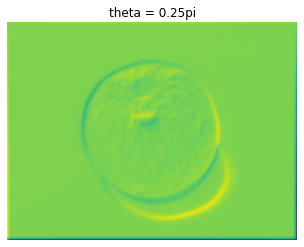

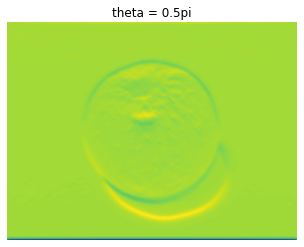

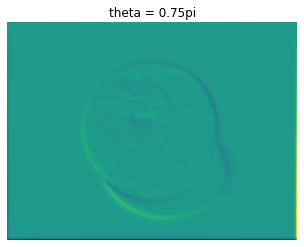

In [38]:
im = imageio.imread('apple.jpg').mean(2)/255.

# Your code here!
######################### Solution code #########################
def oriented_grad(Ix, Iy, theta):
  result = (math.cos(theta) * Ix) + (math.sin(theta) * Iy)
  #result = np.zeros(Ix.shape)
  #for x in range(Ix.shape[0]):
  #  for y in range(Ix.shape[1]):
  #    result[x,y] = math.cos(theta) * Ix[x,y] + math.sin(theta) * Iy[x,y]
  return result

im_blur = scipy.ndimage.convolve(im, gaussian_filter(sigma=2, shape=(11,11)), mode='constant', cval=0.0)
dx = np.array([[-1,1]])
dy = np.array([[-1],[1]])
Ix = convolve(im_blur, dx)
Iy = convolve(im_blur, dy)

grad1 = oriented_grad(Ix, Iy, 0.25*math.pi)
grad2 = oriented_grad(Ix, Iy, 0.5*math.pi)
grad3 = oriented_grad(Ix, Iy, 0.75*math.pi)

plt.figure()
plt.title("Original Image")
plt.axis("off")
plt.imshow(im)

plt.figure()
plt.title("theta = 0.25pi")
plt.axis("off")
plt.imshow(grad1)

plt.figure()
plt.title("theta = 0.5pi")
plt.axis("off")
plt.imshow(grad2)

plt.figure()
plt.title("theta = 0.75pi")
plt.axis("off")
plt.imshow(grad3)


######################### End solution code #########################

# Convert Notebook to PDF

In [40]:
# generate pdf
# %%capture
!git clone https://gist.github.com/bc5f1add34fef7c7f9fb83d3783311e2.git
!cp bc5f1add34fef7c7f9fb83d3783311e2/colab_pdf.py colab_pdf.py
from colab_pdf import colab_pdf
# change the name to your ipynb file name shown on the top left of Colab window
# Important: make sure that your file name does not contain spaces!
colab_pdf('cktran_09859713.ipynb')

fatal: destination path 'bc5f1add34fef7c7f9fb83d3783311e2' already exists and is not an empty directory.
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/d

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'